#**Exponential smoothing**



##  install these libraries using pip:



In [180]:
!pip install pandas matplotlib

In [181]:
import pandas as pd
import matplotlib.pyplot as plt


## Loading dataset

In [182]:
data = pd.read_csv('/content/traffic.csv')
print(data.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [183]:
data.drop('ID', axis=1, inplace=True)

In [184]:
data.drop('Junction', axis=1, inplace=True)

In [185]:
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date
data.set_index('DateTime', inplace=True)
print(data.head())

            Vehicles
DateTime            
2015-11-01        15
2015-11-01        13
2015-11-01        10
2015-11-01         7
2015-11-01         9


## Visualizing the data





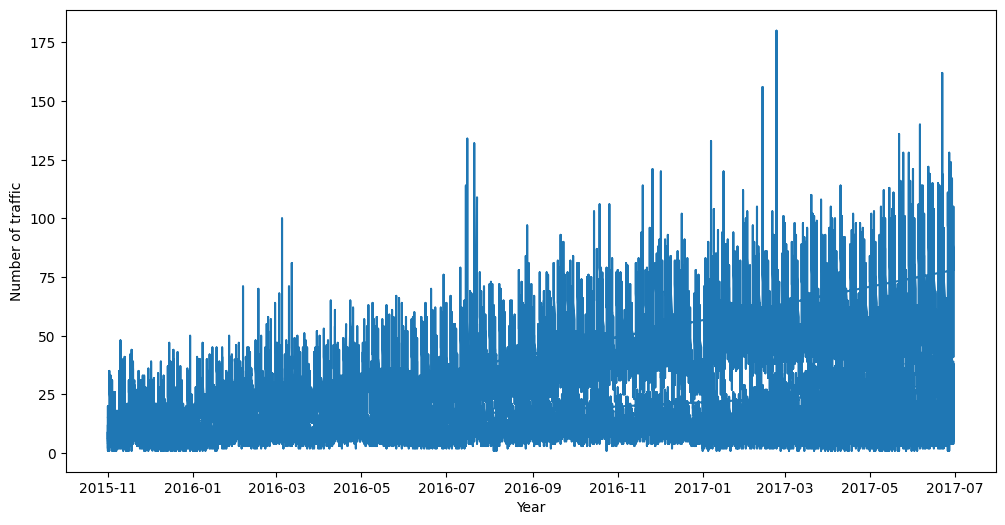

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of traffic')
plt.show()


#**Single Exponential smoothing**





In [187]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(data)
model_single_fit = model.fit(smoothing_level=0.2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


## Making predictions





In [188]:
forecast_single = model_single_fit.forecast(40)
print(forecast_single)


48120    16.338498
48121    16.338498
48122    16.338498
48123    16.338498
48124    16.338498
48125    16.338498
48126    16.338498
48127    16.338498
48128    16.338498
48129    16.338498
48130    16.338498
48131    16.338498
48132    16.338498
48133    16.338498
48134    16.338498
48135    16.338498
48136    16.338498
48137    16.338498
48138    16.338498
48139    16.338498
48140    16.338498
48141    16.338498
48142    16.338498
48143    16.338498
48144    16.338498
48145    16.338498
48146    16.338498
48147    16.338498
48148    16.338498
48149    16.338498
48150    16.338498
48151    16.338498
48152    16.338498
48153    16.338498
48154    16.338498
48155    16.338498
48156    16.338498
48157    16.338498
48158    16.338498
48159    16.338498
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Single Exponential Smoothing




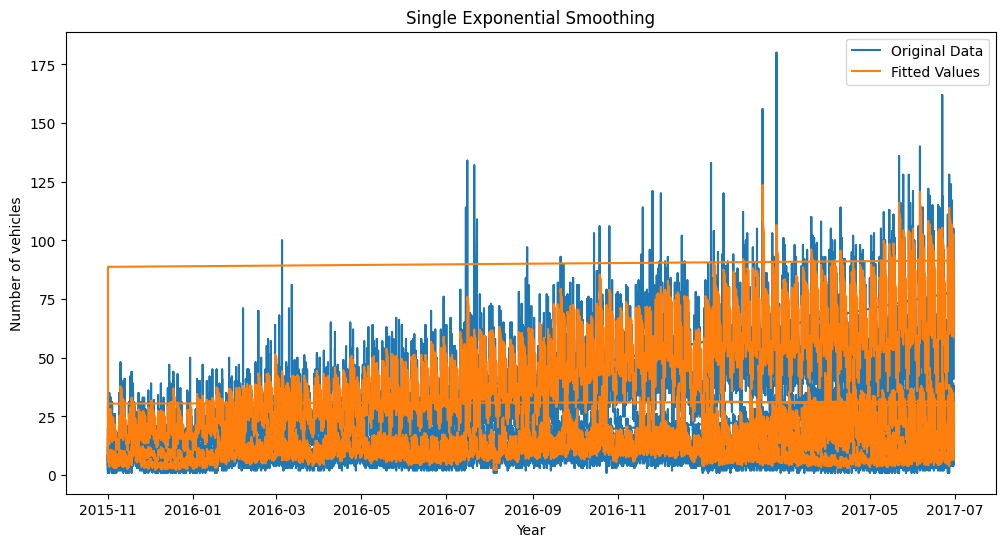

In [198]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')

plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()


#**Double Exponential Smoothing**




In [190]:
from statsmodels.tsa.api import Holt

model_double = Holt(data)
model_double_fit = model_double.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Making predictions



In [191]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


48120    12.060321
48121    12.069537
48122    12.078752
48123    12.087968
48124    12.097184
48125    12.106399
dtype: float64


## Visualize Double Exponential Smoothing




In [192]:
forecast_double = model_double_fit.forecast(40)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


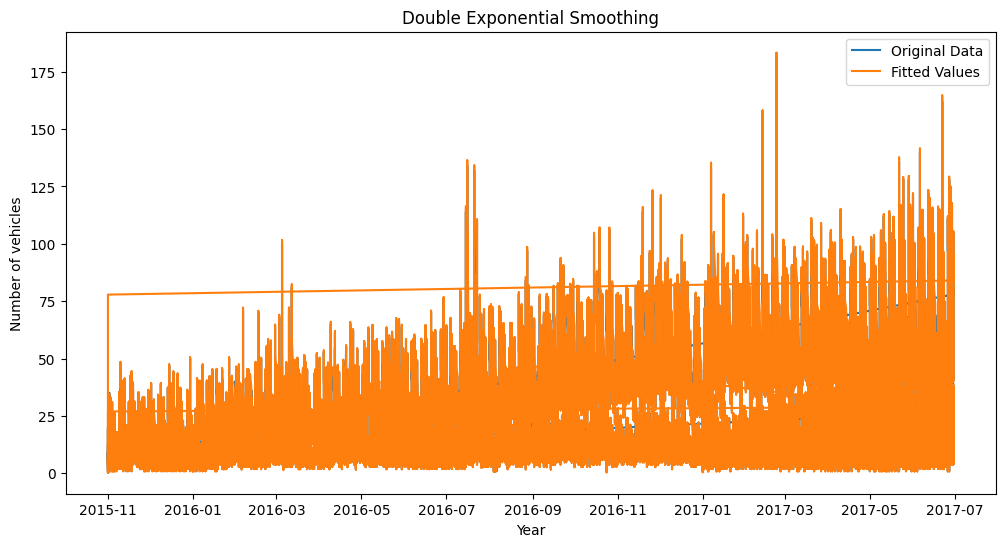

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Number of vehicles')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [194]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## Making predictions



In [195]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


48120    12.842643
48121    11.607506
48122    12.352857
48123    12.549713
48124    11.862394
48125    11.728760
dtype: float64


## Visualize Triple Exponential Smoothing




In [196]:
forecast_triple = model_triple_fit.forecast(40)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


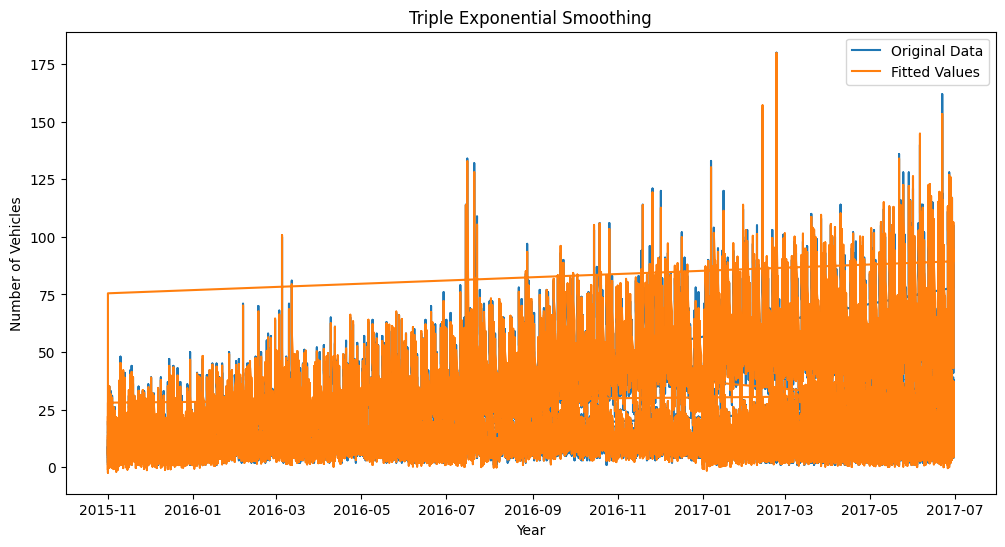

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**